## Series temporales

Winston Pernett, María Fernanda Palacio

-----------------

--------------------------------
# 2.2. Primer modelo prophet

El registro más largo de mediciones directas de CO2 en la atmósfera se inició en marzo de 1958 por Charles David Keeling de la Institución Scripps de Oceanografía. Keeling tenía su base en La Jolla, California, pero había recibido permiso de la Administración Nacional Oceánica y Atmosférica (NOAA) para usar sus instalaciones ubicadas a dos millas sobre el nivel del mar en la ladera norte de Mauna Loa, un volcán en la isla de Hawái, para recoger muestras de dióxido de carbono. A esa altura, las mediciones de Keeling no se verían afectadas por las emisiones locales de CO2, como las de las fábricas cercanas.

En 1961, Keeling publicó los datos que había recopilado hasta el momento, estableciendo que había una fuerte variación estacional en los niveles de CO2 y que aumentaban constantemente, una tendencia que luego se conoció como la Curva de Keeling. Para mayo de 1974, la NOAA había comenzado sus propias mediciones paralelas y las ha continuado desde entonces.

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
import random
random.seed(42)  # set random seed for repeatability

from prophet.plot import add_changepoints_to_plot

# Problema:

Desarrollar la prediccion para los proximos 7 dias del precio de ecopetrol.

In [ ]:
import os
import requests
import pandas as pd

def historicos(symbol=None):
    if symbol is None:
        raise ValueError("No symbol has been provided")
    payload = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": symbol,
        "outputsize": "compact",
        "datatype": "json",
        "apikey": "1YRUXLX8SQ3GD7ZE",
    }
    api_url = "https://www.alphavantage.co/query"
    try:
        response = requests.get(api_url, params=payload)
    except:
        raise ValueError("No response using api key: " + api_key)
    data = response.json()
    k = list(data.keys())
    metadata = data[k[0]]
    timeseries = data[k[1]]
    S = pd.DataFrame.from_dict(timeseries).T
    S = S.apply(pd.to_numeric)
    S.columns = [h.lstrip('12345678. ') for h in S.columns]
    cierre=S['close']
    return cierre

def rendimientos(a):
    data=[]
    tam=len(a)
    tam=tam-1
    for i in range(tam):
        data.append(1-(a[i+1]/a[i]))
    return data

In [ ]:
import pandas as pd
import numpy as np

eco = historicos('EC')
bc = historicos('BAC')
apple = historicos('AAPL')
google = historicos('GOOGL')

r2=rendimientos(eco)
r3=rendimientos(bc)
r4=rendimientos(apple)
r5=rendimientos(google)

datos=np.array([r2,r3,r4,r5])
covMatrix=np.cov(datos,bias=True)
np.set_printoptions(suppress=True)
print(covMatrix)

df=pd.DataFrame(covMatrix,index=['EC','BAC','AAPL','GOOGL'])
df.columns=['EC','BAC','AAPL','GOOGL']
pd.set_option('display.float_format',lambda x: '%.6f' % x)
df

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'EC', '3. Last Refreshed': '2022-11-09', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2022-11-09': {'1. open': '10.49', '2. high': '10.625', '3. low': '9.78', '4. close': '9.83', '5. adjusted close': '9.83', '6. volume': '1470528', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2022-11-08': {'1. open': '10.13', '2. high': '10.275', '3. low': '9.965', '4. close': '10.21', '5. adjusted close': '10.21', '6. volume': '1483607', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2022-11-07': {'1. open': '10.07', '2. high': '10.2213', '3. low': '9.97', '4. close': '10.21', '5. adjusted close': '10.21', '6. volume': '1093688', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2022-11-04': {'1. open': '9.97', '2. high': '10.14', '3. low': '9.775', '4. close': '9.97', '5. adjusted close': '9.97', '6. volume': '1

,EC,BAC,AAPL,GOOGL
EC,0.001120,0.000273,0.000189,-0.004738
BAC,0.000273,0.000388,0.000217,0.000357
AAPL,0.000189,0.000217,0.000458,0.004496
GOOGL,-0.004738,0.000357,0.004496,3.803307


In [ ]:
s=pd.DataFrame(eco)
s.rename(columns={'close':'ecopetrol'},inplace=True)
s['bankoa']=bc
s['apple']=apple
s['google']=google
s

,ecopetrol,bankoa,apple,google
2022-11-09,9.830000,36.520000,134.870000,87.320000
2022-11-08,10.210000,37.110000,139.500000,88.900000
2022-11-07,10.210000,37.010000,138.920000,88.490000
2022-11-04,9.970000,36.790000,138.380000,86.580000
2022-11-03,9.720000,35.890000,138.880000,83.430000
...,...,...,...,...
2022-06-27,11.770000,32.350000,141.660000,2316.670000
2022-06-24,11.030000,32.310000,141.660000,2359.500000
2022-06-23,10.820000,32.080000,138.270000,2244.840000
2022-06-22,11.540000,32.600000,135.350000,2229.750000


In [ ]:
s = s.sort_index(axis=0)

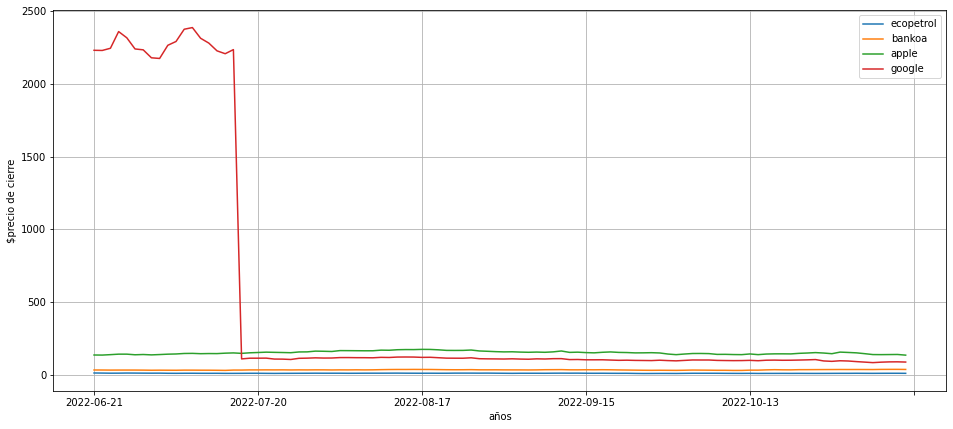

In [ ]:
s.plot(figsize=(16,7),xlabel="años",ylabel="$precio de cierre",grid=True);

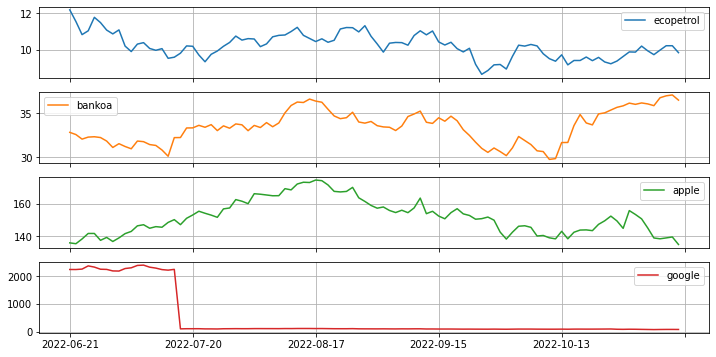

In [ ]:
s.plot(subplots=True,figsize=(12,6),grid=True);

In [ ]:
precio=[eco[0],bc[0],apple[0],google[0]]
precio={'EC':eco[0], 'BAC':bc[0], 'AAPL':apple[0], 'GOOGL':google[0]}
precio

{'EC': 9.83, 'BAC': 36.52, 'AAPL': 134.87, 'GOOGL': 87.32}

In [ ]:

m2 = np.mean(r2)
m3 = np.mean(r3)
m4 = np.mean(r4)
m5 = np.mean(r5)
miu=[m2,m3,m4,m5]
miu={'EC':m2, 'BAC':m3, 'AAPL':m4, 'GOOGL':m5}
miu

{'EC': -0.0027227148002681796,
 'BAC': 0.0008726580919293623,
 'AAPL': -0.0003032291191994811,
 'GOOGL': -0.1995518021316799}

In [ ]:
d = {'ds': s.index, 'y': s.ecopetrol}
dataModel = pd.DataFrame(d)
dataModel.head()

,ds,y
2022-06-21,2022-06-21,12.180000
2022-06-22,2022-06-22,11.540000
2022-06-23,2022-06-23,10.820000
2022-06-24,2022-06-24,11.030000
2022-06-27,2022-06-27,11.770000


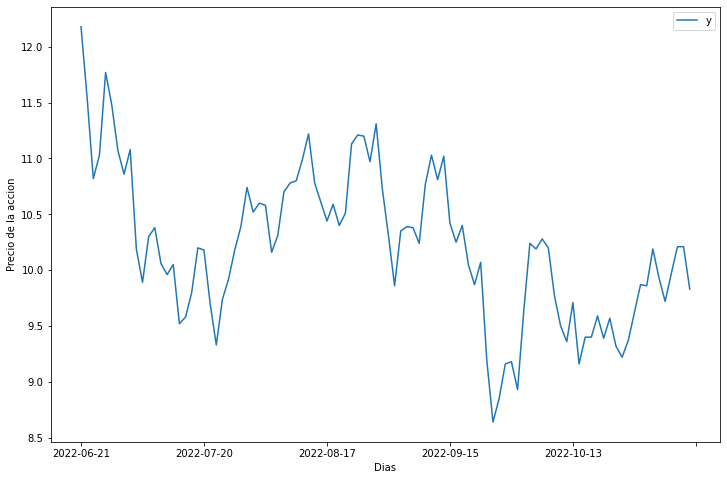

In [ ]:
ax = dataModel.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Precio de la accion')
ax.set_xlabel('Dias')

plt.show()

In [ ]:
model = Prophet()
# fit the model
model.fit(dataModel)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2k018ro7/smtgr7cm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2k018ro7/m_0ipzx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41800', 'data', 'file=/tmp/tmp2k018ro7/smtgr7cm.json', 'init=/tmp/tmp2k018ro7/m_0ipzx4.json', 'output', 'file=/tmp/tmp2k018ro7/prophet_modelcz1jgtdt/prophet_model-20221109234233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:42:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

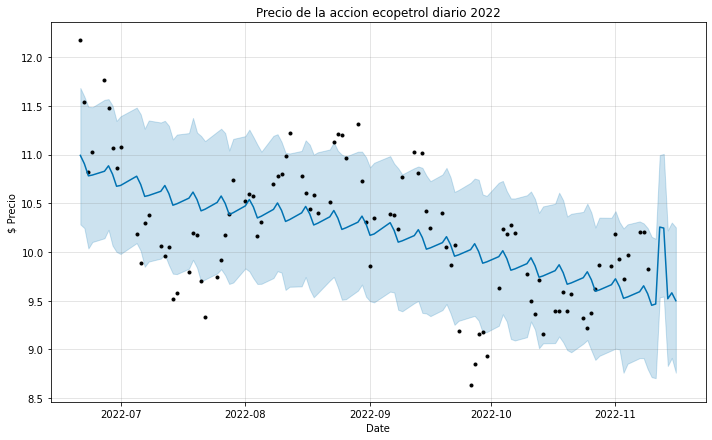

In [ ]:
fig = model.plot(forecast, xlabel='Date', ylabel=r'$ Precio')
plt.title('Precio de la accion ecopetrol diario 2022')
plt.show()